<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#simple-prefect-sklearn-workflow" data-toc-modified-id="simple-prefect-sklearn-workflow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>simple prefect sklearn workflow</a></span></li><li><span><a href="#jupyter-cell-workflow" data-toc-modified-id="jupyter-cell-workflow-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>jupyter cell workflow</a></span></li><li><span><a href="#import_dataset" data-toc-modified-id="import_dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>import_dataset</a></span></li><li><span><a href="#get_train" data-toc-modified-id="get_train-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>get_train</a></span></li><li><span><a href="#get_target" data-toc-modified-id="get_target-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>get_target</a></span></li><li><span><a href="#create_ML_Model" data-toc-modified-id="create_ML_Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>create_ML_Model</a></span></li><li><span><a href="#run_cross_val" data-toc-modified-id="run_cross_val-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>run_cross_val</a></span></li><li><span><a href="#plot_cross_val" data-toc-modified-id="plot_cross_val-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>plot_cross_val</a></span></li><li><span><a href="#flow" data-toc-modified-id="flow-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>flow</a></span></li></ul></div>

# simple prefect sklearn workflow

[2022-04-22 14:20:19-0400] INFO - prefect.FlowRunner | Beginning Flow run for 'ML'
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'import_dataset': Starting task run...


C:\Users\anhmi\AppData\Local\Continuum\anaconda3\envs\gpu38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'import_dataset': Finished task run for task with final state: 'Success'
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'create_ML_Model': Starting task run...
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'create_ML_Model': Finished task run for task with final state: 'Success'
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'get_train': Starting task run...
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'get_train': Finished task run for task with final state: 'Success'
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'get_target': Starting task run...
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'get_target': Finished task run for task with final state: 'Success'
[2022-04-22 14:20:19-0400] INFO - prefect.TaskRunner | Task 'run_cross_val': Starting task run...
[2022-04-22 14:20:20-0400] INFO - prefect.TaskRunner | Task 'run_cross_val': Finished tas

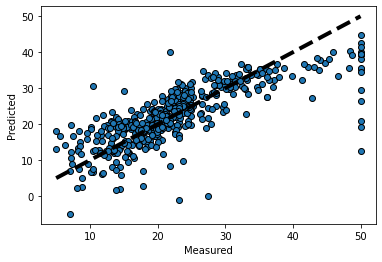

[2022-04-22 14:20:20-0400] INFO - prefect.TaskRunner | Task 'plot_cross_val': Finished task run for task with final state: 'Success'
[2022-04-22 14:20:20-0400] INFO - prefect.FlowRunner | Flow run SUCCESS: all reference tasks succeeded


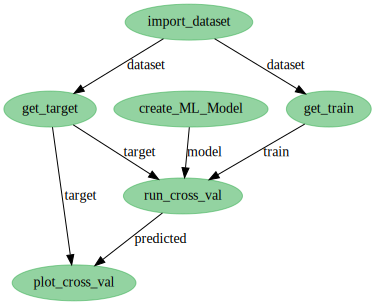

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
import numpy
import pandas
from matplotlib import pyplot
%matplotlib inline

from prefect import Flow, Parameter, task

@task
def import_dataset():
    dataset = datasets.load_boston()
    return dataset

@task
def get_train(dataset):
    train = dataset.data
    
    return train
    
@task
def get_target(dataset):
    target = dataset.target
    
    return target

@task
def create_ML_Model():
    model = LinearRegression()
    return model

@task
def run_cross_val(model, train, target):
    predicted = cross_val_predict(model, train , target, cv=10)
    return predicted

@task
def plot_cross_val(target, predicted):
    fig, ax = pyplot.subplots()
    ax.scatter(target, predicted, edgecolors=(0, 0, 0))
    ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    pyplot.show()
    
with Flow("ML") as flow:
    dataset = import_dataset()
    train = get_train(dataset)
    target = get_target(dataset)
    model = create_ML_Model()
    predicted = run_cross_val(model, train, target)
    plot_cross_val(target, predicted)
    
state_flow = flow.run()
flow.visualize(state_flow)

# jupyter cell workflow

* The Pain:
   + Jupyter cells are messy
   + it is hard to follow 
   + if you have an error of the cell, you have to take some time to look for your error

* The Pain-Removal Feature: The workflow diagram 
    + it is like a mini map 
    + it can be click and navigate back to the cell
    + it is located on a side panel for easy navigation
    + if you have an error on the function, you can navigate back and fix it
    



In [3]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
import numpy
import pandas
from matplotlib import pyplot
%matplotlib inline

from prefect import Flow, Parameter, task

# import_dataset

In [4]:
@task
def import_dataset():
    dataset = datasets.load_boston()
    return dataset

# get_train

In [5]:
@task
def get_train(dataset):
    train = dataset.data
    
    return train

# get_target

In [6]:
@task
def get_target(dataset):
#     target = dataset.target

    # let say you have an error here
    # this task is turning red on prefect workflow diagram
    # Before I had to use jupyter extension to navigate back
    
    # With the new feature, I can click on the task circle and get back to this cell
    target = datast.target
    
    return target

# create_ML_Model

In [7]:
@task
def create_ML_Model():
    model = LinearRegression()
    return model

# run_cross_val

In [8]:
@task
def run_cross_val(model, train, target):
    predicted = cross_val_predict(model, train , target, cv=10)
    return predicted

# plot_cross_val

In [9]:
@task
def plot_cross_val(target, predicted):
    fig, ax = pyplot.subplots()
    ax.scatter(target, predicted, edgecolors=(0, 0, 0))
    ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    pyplot.show()

# flow

[2022-04-22 14:20:20-0400] INFO - prefect.FlowRunner | Beginning Flow run for 'ML'
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'import_dataset': Starting task run...
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'import_dataset': Finished task run for task with final state: 'Success'
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'create_ML_Model': Starting task run...
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'create_ML_Model': Finished task run for task with final state: 'Success'
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'get_target': Starting task run...
[2022-04-22 14:20:21-0400] ERROR - prefect.TaskRunner | Task 'get_target': Exception encountered during task execution!
Traceback (most recent call last):
  File "C:\Users\anhmi\AppData\Local\Continuum\anaconda3\envs\gpu38\lib\site-packages\prefect\engine\task_runner.py", line 880, in get_task_run_state
    value = prefect.utilities.executors.run_task_wi

C:\Users\anhmi\AppData\Local\Continuum\anaconda3\envs\gpu38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'run_cross_val': Starting task run...
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'run_cross_val': Finished task run for task with final state: 'TriggerFailed'
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'plot_cross_val': Starting task run...
[2022-04-22 14:20:21-0400] INFO - prefect.TaskRunner | Task 'plot_cross_val': Finished task run for task with final state: 'TriggerFailed'
[2022-04-22 14:20:21-0400] INFO - prefect.FlowRunner | Flow run FAILED: some reference tasks failed.


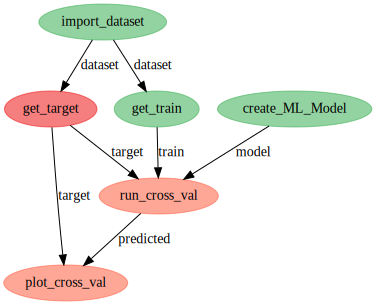

In [10]:
with Flow("ML") as flow:
    dataset = import_dataset()
    train = get_train(dataset)
    target = get_target(dataset)
    model = create_ML_Model()
    predicted = run_cross_val(model, train, target)
    plot_cross_val(target, predicted)
    
state_flow = flow.run()
flow.visualize(state_flow)